In [55]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [13]:
sp500 = yf.Ticker("^GSPC") # downloaded stock data

In [14]:
sp500 = sp500.history(period="max") # downloaded stock data

In [15]:
sp500 # visualizing stock data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,0.0,0.0
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,0.0,0.0
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,0.0,0.0


In [16]:
sp500.index # visualizing stock data

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-05 00:00:00-04:00', '2024-06-06 00:00:00-04:00',
               '2024-06-07 00:00:00-04:00', '2024-06-10 00:00:00-04:00',
               '2024-06-11 00:00:00-04:00', '2024-06-12 00:00:00-04:00',
               '2024-06-13 00:00:00-04:00', '2024-06-14 00:00:00-04:00',
               '2024-06-17 00:00:00-04:00', '2024-06-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24232, freq=None)

<Axes: xlabel='Date'>

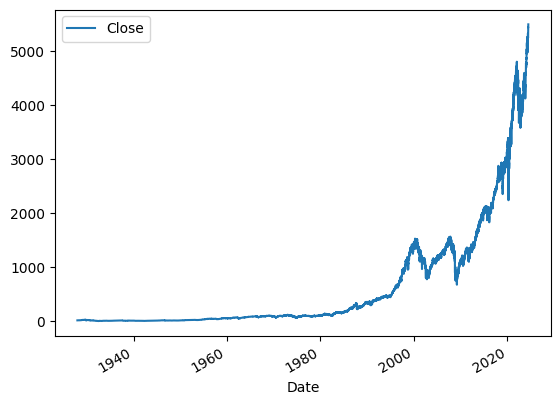

In [17]:
sp500.plot.line(y="Close", use_index=True) # visualizing stock data

In [18]:
del sp500["Dividends"] # cleaning data
del sp500["Stock Splits"]

In [19]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # cleaning data

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980


In [21]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # setting up machine learning target

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980,1


In [23]:
sp500 = sp500.loc["1990-01-01":].copy() # setting up machine learning target

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0
2024-06-14 00:00:00-04:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5473.229980,1


In [25]:
from sklearn.ensemble import RandomForestClassifier # training initial model

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
from sklearn.metrics import precision_score # training initial model

preds = model.predict(test[predictors])

In [27]:
import pandas as pd # training initial model

preds = pd.Series(preds, index=test.index)

In [28]:
precision_score(test["Target"], preds) # training initial model

C:\Users\Ari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [29]:
combined = pd.concat ([test["Target"], preds], axis=1) # training initial model

<Axes: xlabel='Date'>

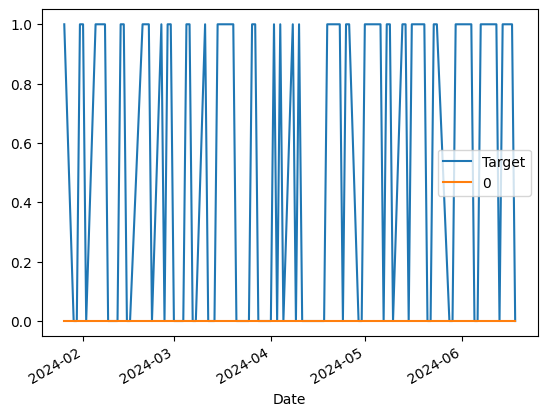

In [30]:
combined.plot() # visualizing model

In [31]:
def predict(train, test, predictors, model): # evaluating error, measuring the error, and creating a backtest
    model.fit(train[predictors], train ["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
def backtest(data, model, predictors, start=2500, step=250): # evaluating error, measuring the error, and creating a backtest
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(sp500, model, predictors) # evaluating error, measuring the error, and creating a backtest

In [34]:
predictions["Predictions"].value_counts() # evaluating error, measuring the error, and creating a backtest

Predictions
0    3586
1    2596
Name: count, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"]) # evaluating error, measuring the error, and creating a backtest

np.float64(0.5288906009244992)

In [36]:
predictions["Target"].value_counts() / predictions.shape[0] # evaluating error, measuring the error, and creating a backtest

Target
1    0.535102
0    0.464898
Name: count, dtype: float64

In [37]:
horizons = [2,5,60,250,1000] # improving model with extra predictor columns
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [38]:
sp500 = sp500.dropna() # cleaning table (dropping NaN)

In [39]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1,1.001353,2.0,1.003229,3.0,1.033823,34.0,1.134670,139.0,1.277522,531.0
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1,1.004234,2.0,1.009236,3.0,1.041707,34.0,1.143307,139.0,1.287680,531.0
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0,1.001171,2.0,1.008569,4.0,1.043297,34.0,1.145014,139.0,1.289994,531.0


In [40]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1) # improving model with extra predictor columns

In [41]:
def predict(train, test, predictors, model): # improving model with extra predictor columns
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat( [test["Target"], preds], axis=1)
    return combined

In [42]:
predictions = backtest(sp500, model, new_predictors) # improving model with extra predictor columns

In [43]:
predictions["Predictions"].value_counts() # improving model with extra predictor columns

Predictions
0.0    4345
1.0     836
Name: count, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"]) # improving model with extra predictor columns

np.float64(0.5741626794258373)